------------------------------
#### Precision-Recall Curves
---------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_recall_curve, precision_score, recall_score

from sklearn.linear_model import LogisticRegression

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# Function to calculate Precision and Recall

def calc_precision_recall(y_true, y_pred):
    
    #y_true = pd.Series(y_true)
    #y_pred = pd.Series(y_pred)
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    # Use try-except statements to avoid problem of dividing by 0
    try:
        precision = TP / (TP + FP)
    except:
        precision = 1
    
    try:
        recall = TP / (TP + FN)
    except:
        recall = 1

    return precision, recall


In [3]:
# Load breast cancer dataset
data = load_breast_cancer()
X, y = data.data, pd.Series(data.target)

In [4]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [5]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size   = 0.2, 
                                                    random_state= 42)

In [6]:
# Create and fit the default KNN classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
y_pred = knn_model.predict(X_test)

In [8]:
# Test function

calc_precision_recall(y_test, y_pred)

(0.9342105263157895, 1.0)

In [16]:
y_test_probs =knn_model.predict_proba(X_test)

In [17]:
y_test_probs = knn_model.predict_proba(X_test)[:,1]

In [18]:
y_test_probs

array([0.6, 0. , 0. , 1. , 1. , 0. , 0. , 0.2, 1. , 1. , 1. , 0. , 0.8,
       0.6, 1. , 0. , 0.6, 1. , 1. , 0. , 0.4, 1. , 0. , 1. , 1. , 1. ,
       1. , 1. , 1. , 0. , 1. , 1. , 1. , 0.6, 1. , 1. , 0. , 1. , 0. ,
       0.8, 1. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0. ,
       1. , 1. , 1. , 1. , 1. , 0. , 0.6, 1. , 1. , 0. , 0. , 0.6, 1. ,
       1. , 0. , 0. , 1. , 1. , 0.4, 0. , 1. , 0.6, 1. , 1. , 1. , 0.6,
       1. , 1. , 0. , 1. , 0.6, 0. , 0. , 0.2, 0.2, 0. , 1. , 1. , 1. ,
       1. , 0.8, 1. , 1. , 1. , 0. , 0. , 1. , 0. , 0. , 1. , 0. , 0. ,
       0.6, 1. , 1. , 0. , 0.8, 0.8, 0. , 1. , 0.8, 0. ])

In [19]:
# Initialize lists to store precision and recall values for different thresholds
thresholds = np.arange(0.1, 1.0, 0.05)

# Containers for true positive / false positive rates
precision_scores = []
recall_scores    = []

In [20]:
# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0, 1, num=100)

In [21]:
# Find true positive / false positive rate for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    precision, recall = calc_precision_recall(y_test, y_test_preds)
        
    precision_scores.append(precision)
    recall_scores.append(recall)

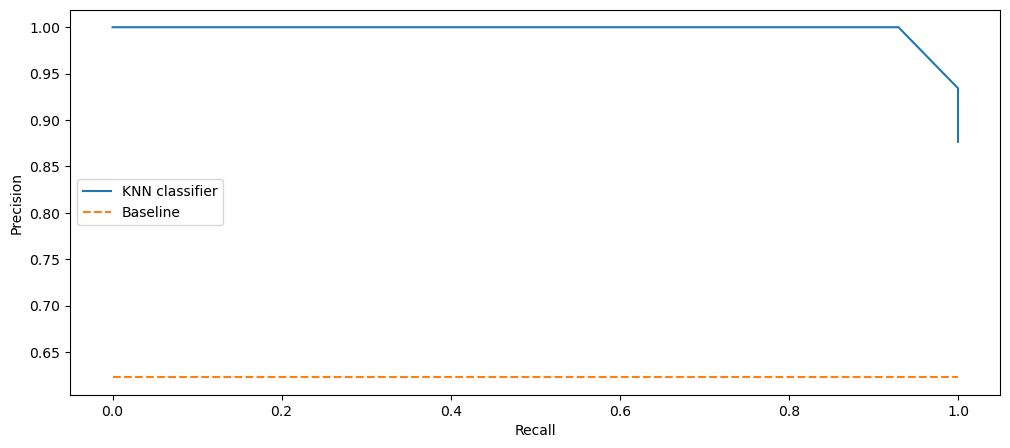

In [22]:
# Plot precision-recall curve

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(recall_scores, precision_scores, label='KNN classifier')
#ax.plot(l2_recall_scores, l2_precision_scores, label='L2 Logistic Regression')
baseline = len(y_test[y_test==1]) / len(y_test)
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left');

- at thresholds with low recall, the precision is correspondingly high, 
- at very high recall, the precision begins to drop